# Chapter 6 : using a neural network to fit the data
### 1. Experiment with the number of hidden neurons in our simple neural network model, as well as the learning rate.
* What changes result in more linear output from the model?
* Can you get the model to obviously overfit the data?

Here we created a simple neural network composed of linear model and a Tanh activation function. We recall the chapter 6 neural network and the training loop.\
We use the thermometer's problematic again for the sake of simplicity. So, there is only one input and one output : the temperature. \
Note that we add an extra dimension at axis 1 because `nn.Linear` expects a batch size, which is 1 here. 

<img src='data/img1.png' width="200" height="200">

In [1]:
### Module import
import torch
import torch.nn as nn
import torch.optim as optim
from collections import OrderedDict

In [37]:
### data train/validation definition
t_celsius = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] 
t_measurement = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_celsius = torch.tensor(t_celsius).unsqueeze(1) #Add an extra dimension as a batch size
t_measurement = torch.tensor(t_measurement).unsqueeze(1)

n_samples = t_measurement.shape[0] 
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val] 
val_indices = shuffled_indices[-n_val:]

t_measurement_train = t_measurement[train_indices]
t_celsius_train = t_celsius[train_indices]

t_measurement_val = t_measurement[val_indices]
t_celsius_val = t_celsius[val_indices]

In [3]:
### Training loop definition
def training_loop(n_epochs, optimizer, model, loss_fn, t_measurement_train, t_measurement_val,
              t_celsius_train, t_celsius_val):
    for epoch in range(1, n_epochs + 1):
        t_predict_train = model(t_measurement_train)
        loss_train = loss_fn(t_predict_train, t_celsius_train)
        
        t_predict_val = model(t_measurement_val)
        loss_val = loss_fn(t_predict_val, t_celsius_val)
        
        optimizer.zero_grad() 
        loss_train.backward() 
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
            f" Validation loss {loss_val.item():.4f}")

In [4]:
### Model definition
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8,1))]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [5]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer, 
    model = seq_model, 
    loss_fn = nn.MSELoss(), 
    t_measurement_train = t_measurement_train*0.1, 
    t_measurement_val = t_measurement_val*0.1, 
    t_celsius_train = t_celsius_train, 
    t_celsius_val = t_celsius_val)

Epoch 1, Training loss 195.1852, Validation loss 87.6198
Epoch 1000, Training loss 5.3407, Validation loss 2.8215
Epoch 2000, Training loss 4.5347, Validation loss 0.5406
Epoch 3000, Training loss 2.2227, Validation loss 2.2614
Epoch 4000, Training loss 1.8835, Validation loss 3.3348
Epoch 5000, Training loss 1.5454, Validation loss 5.1253


If we want to go back to more linear output, we just have to set our model with `nn.Linear`, and feed it with the number of input and output expected which are one.

In [6]:
linear_model = nn.Linear(1,1)
linear_model

Linear(in_features=1, out_features=1, bias=True)

In [7]:
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer, 
    model = linear_model, 
    loss_fn = nn.MSELoss(), 
    t_measurement_train = t_measurement_train*0.1, 
    t_measurement_val = t_measurement_val*0.1, 
    t_celsius_train = t_celsius_train, 
    t_celsius_val = t_celsius_val)

Epoch 1, Training loss 210.7383, Validation loss 94.3292
Epoch 1000, Training loss 4.6618, Validation loss 2.6650
Epoch 2000, Training loss 2.7083, Validation loss 4.1018
Epoch 3000, Training loss 2.5463, Validation loss 5.7340
Epoch 4000, Training loss 2.5328, Validation loss 6.3050
Epoch 5000, Training loss 2.5317, Validation loss 6.4778


Back to our sequential model, let's see how to get the model overfit.

We recall that overfit happens when the model cannot generalize unseen data. It can be due to a lack of training data : the model can't "learn" enough and generalize through validation data. Also, it could appear with bad hyperparameters : if the model is too constrain, it will focus on the training data and try to fit them all. In that case, it will try to fit all the noisy ones, so it will result to a bad generalization to unseen data.

Here, since the problem is really simple, we'll try to overfit the data by modifying the training data (it appears to be impossible to overfit by tuning the parameters due to the simplicity of the problem). We'll switch the split ratio train/validation so there will be much less training data than validation data. 

In [35]:
n_samples = t_measurement.shape[0] 
n_val = int(0.8 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val] 
val_indices = shuffled_indices[-n_val:]

t_measurement_train_new = t_measurement[train_indices]
t_celsius_train_new = t_celsius[train_indices]

t_measurement_val_new = t_measurement[val_indices]
t_celsius_val_new = t_celsius[val_indices]

In [36]:
seq_model_overfitted = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1,8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8,1))]))


optimizer = optim.SGD(seq_model_overfitted.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer, 
    model = seq_model_overfitted, 
    loss_fn = nn.MSELoss(), 
    t_measurement_train = t_measurement_train_new*0.1, 
    t_measurement_val = t_measurement_val_new*0.1, 
    t_celsius_train = t_celsius_train_new, 
    t_celsius_val = t_celsius_val_new)

Epoch 1, Training loss 28.6135, Validation loss 240.7722
Epoch 1000, Training loss 2.2076, Validation loss 82.8351
Epoch 2000, Training loss 0.0275, Validation loss 65.8818
Epoch 3000, Training loss 0.0015, Validation loss 66.5721
Epoch 4000, Training loss 0.0001, Validation loss 66.7840
Epoch 5000, Training loss 0.0000, Validation loss 66.8394


In this configuration, fitting the training data is very simple : there are only 3 points to fit and its training loss is close to zero. But when the model is facing the validation data (the 'unseen' ones), it can't generelized, which leads to a non satisfying validation loss.

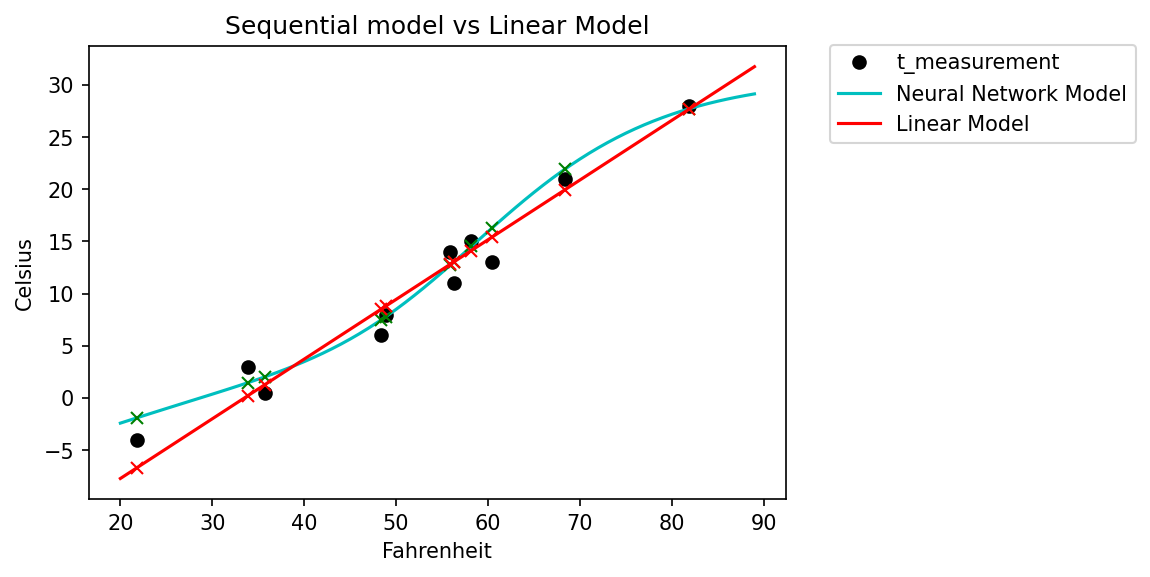

In [53]:
from matplotlib import pyplot as plt
t_range = torch.arange(20., 90.).unsqueeze(1) 
fig = plt.figure(dpi=150)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")

plt.plot(t_measurement.numpy(), t_celsius.numpy(), 'o', color='black', label='t_measurement')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-', label='Neural Network Model') 
plt.plot(t_measurement.numpy(), seq_model(0.1 * t_measurement).detach().numpy(), 'kx', color='green')

plt.plot(t_range.numpy(), linear_model(0.1 * t_range).detach().numpy(),'c-', color='red', label='Linear Model')
plt.plot(t_measurement.numpy(), linear_model(0.1 * t_measurement).detach().numpy(), 'kx', color='red')

fig.legend(bbox_to_anchor=(1.3, .9))
plt.title('Sequential model vs Linear Model');

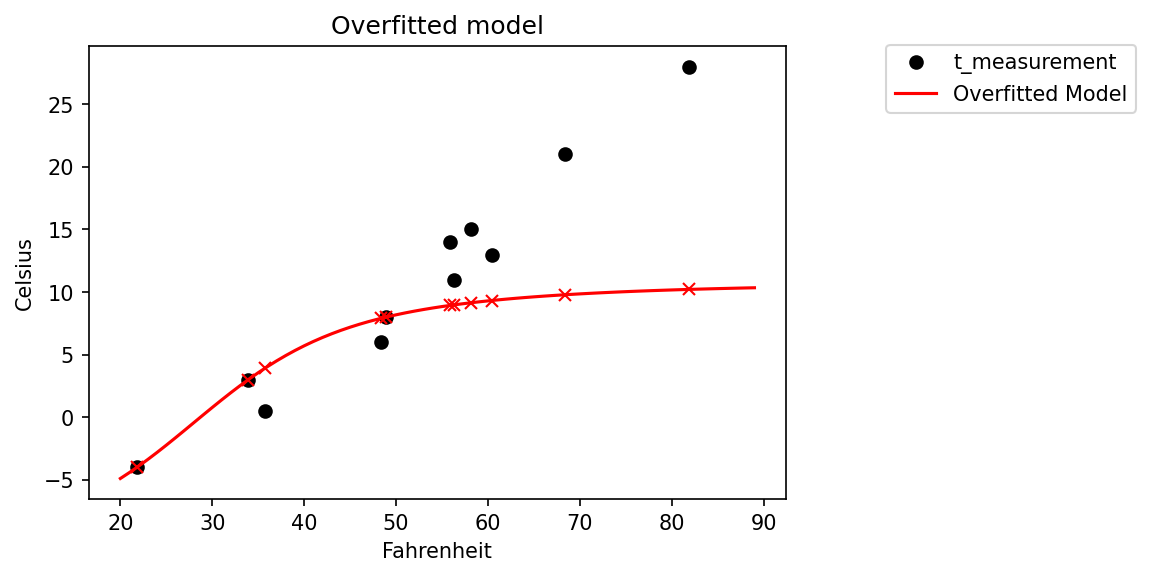

In [55]:
from matplotlib import pyplot as plt
t_range = torch.arange(20., 90.).unsqueeze(1) 
fig = plt.figure(dpi=150)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")

plt.plot(t_measurement.numpy(), t_celsius.numpy(), 'o', color='black', label='t_measurement')

plt.plot(t_range.numpy(), seq_model_overfitted(0.1 * t_range).detach().numpy(),'c-', color='red', label='Overfitted Model')
plt.plot(t_measurement.numpy(), seq_model_overfitted(0.1 * t_measurement).detach().numpy(), 'kx', color='red')

fig.legend(bbox_to_anchor=(1.3, .9))
plt.title('Overfitted model');